In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('financial_data.csv')

In [6]:
df.drop('isFlaggedFraud', axis = 1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


##### Checking to see if the dataset is balanced or unbalanced

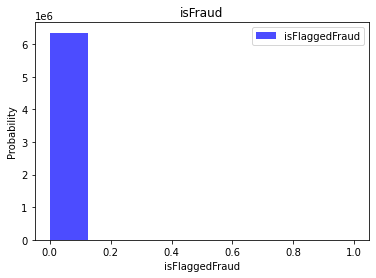

In [10]:

label = df.columns[-1]
plt.hist(df['isFraud'], color='blue', label=label, alpha=0.7, bins=8)
plt.title('isFraud')
plt.ylabel("Probability")
plt.xlabel(label)
plt.legend()
plt.show()

###### The dataset is extremely skewed, so I will be employing RandomUnderSampler to even out the sample

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
Counter(y)

Counter({0: 6362604, 1: 16})

In [25]:
rus = RandomUnderSampler()
rus_X, rus_y = rus.fit_resample(X,y)
Counter(rus_y)

Counter({0: 16, 1: 16})

##### Scaling the value so disproportionate values don't affect the model

In [47]:
X_to_scale = rus_X[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
scaler = StandardScaler()
X_to_scale = pd.DataFrame(scaler.fit_transform(X_to_scale),columns = X_to_scale.columns)

In [48]:
X_scaled = rus_X
for col in X_to_scale:
    X_scaled[col]=X_to_scale[col[:]]

In [49]:
pca =PCA()
pca.fit_transform(X_scaled)

ValueError: could not convert string to float: 'CASH_OUT'